<a href="https://colab.research.google.com/github/Anaamsaid/potatos-disease-classification-using-CNN/blob/main/CNN_potatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/PlantVillage

/content/drive/MyDrive/PlantVillage


In [ ]:
data_path = '/content/drive/MyDrive/PlantVillage'

In [ ]:
tf.random.set_seed(123)

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    shuffle=True,
    batch_size= BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)

)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

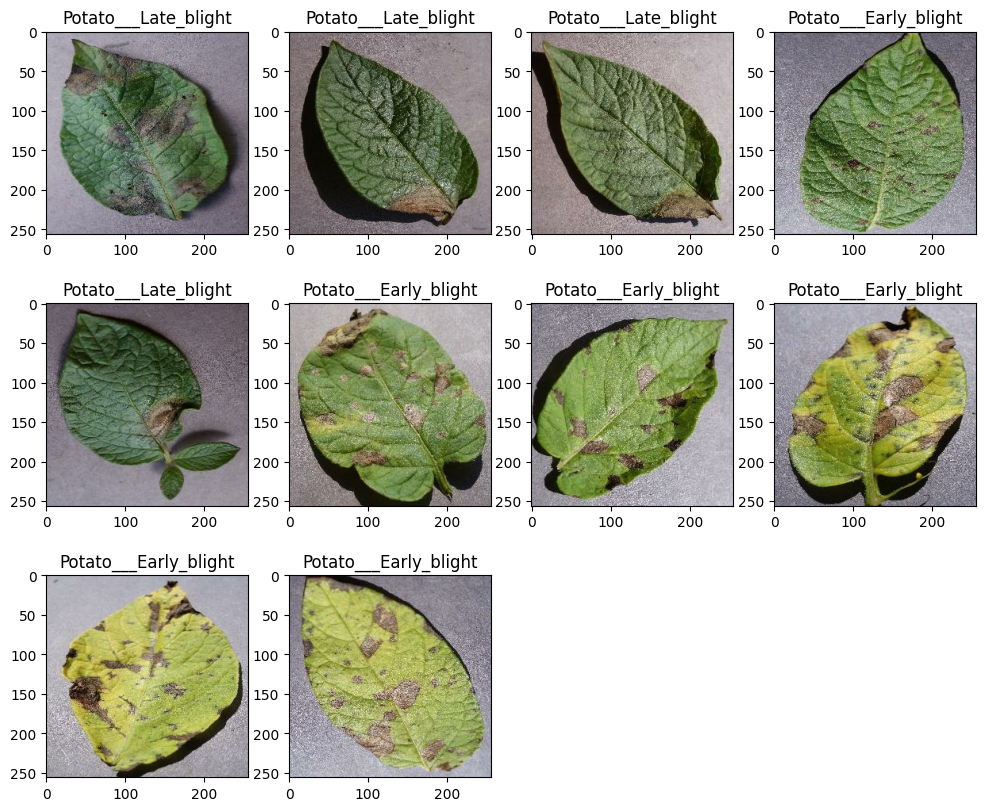

In [ ]:
plt.figure(figsize=(12,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

In [ ]:
# utuiliser une fonction pour diviser notre dataset
def get_dataset_partitions_tf(data, train=0.8, validation=0.1, test=0.1, shuffle = True, shuffle_size=10000 ):
    data_size = len(data)

    if shuffle:
        data = data.shuffle(shuffle_size, seed=123)

    train_size = int(train*data_size)
    val_size = int(validation*data_size)

    train_data = data.take(train_size)
    val_data = data.take(val_size)
    test_data = data.skip(train_size).skip(val_size)
    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_data)

54

In [ ]:
len(val_data)

6

In [ ]:
len(test_data)

8

In [ ]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

**image pre-preprocessing**

In [ ]:
#(pour les images différent de 256*256)
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# for rotated and flipped images ...
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
in_sh = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape = in_sh),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),


])
model.build(input_shape= in_sh)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data= val_data
)

Epoch 1/50
54/54 [==============================] - 635s 97ms/step - loss: 0.8840 - accuracy: 0.5205 - val_loss: 0.7627 - val_accuracy: 0.6555
Epoch 2/50
54/54 [==============================] - 4s 80ms/step - loss: 0.7310 - accuracy: 0.6696 - val_loss: 0.6588 - val_accuracy: 0.7195
Epoch 3/50
54/54 [==============================] - 4s 75ms/step - loss: 0.5139 - accuracy: 0.7664 - val_loss: 0.3477 - val_accuracy: 0.8492
Epoch 4/50
54/54 [==============================] - 4s 76ms/step - loss: 0.3717 - accuracy: 0.8457 - val_loss: 0.2087 - val_accuracy: 0.9178
Epoch 5/50
54/54 [==============================] - 4s 76ms/step - loss: 0.3235 - accuracy: 0.8779 - val_loss: 0.5247 - val_accuracy: 0.7870
Epoch 6/50
54/54 [==============================] - 4s 76ms/step - loss: 0.2631 - accuracy: 0.8985 - val_loss: 0.3496 - val_accuracy: 0.8609
Epoch 7/50
54/54 [==============================] - 4s 83ms/step - loss: 0.1382 - accuracy: 0.9560 - val_loss: 0.3375 - val_accuracy: 0.8744
Epoch 8/50


In [ ]:
scores = model.evaluate(test_data)

54/54 [==============================] - 1s 20ms/step - loss: 0.0142 - accuracy: 0.9959


In [ ]:
scores

[0.014231428503990173, 0.9958920478820801]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation loss')

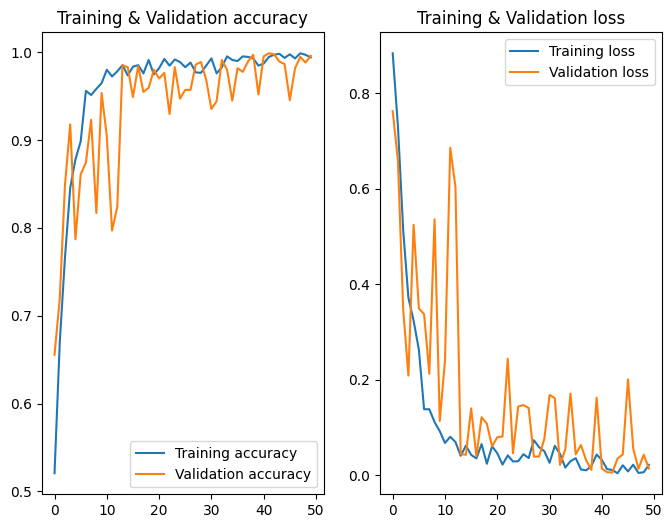

In [ ]:
plt.figure(figsize= (8,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation accuracy')
plt.legend()
plt.title('Training & Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend()
plt.title('Training & Validation loss')

actual label    : Potato___Early_blight
1/1 [==============================] - 0s 158ms/step
predicted label   : Potato___Early_blight


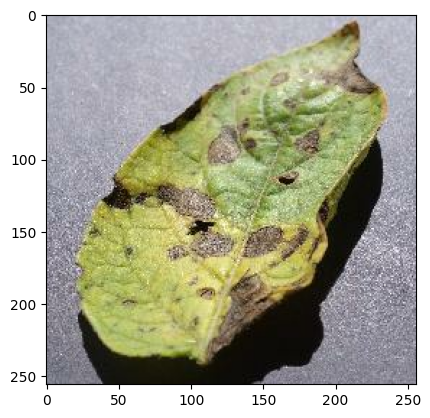

In [ ]:
for image_batch, label_batch in test_data.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  plt.imshow(first_image)
  print( "actual label    :",  class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print("predicted label   :",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, image):
  image_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
  image_array = tf.expand_dims(image_array, 0)   # creer batch

  predictions = model.predict(image_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


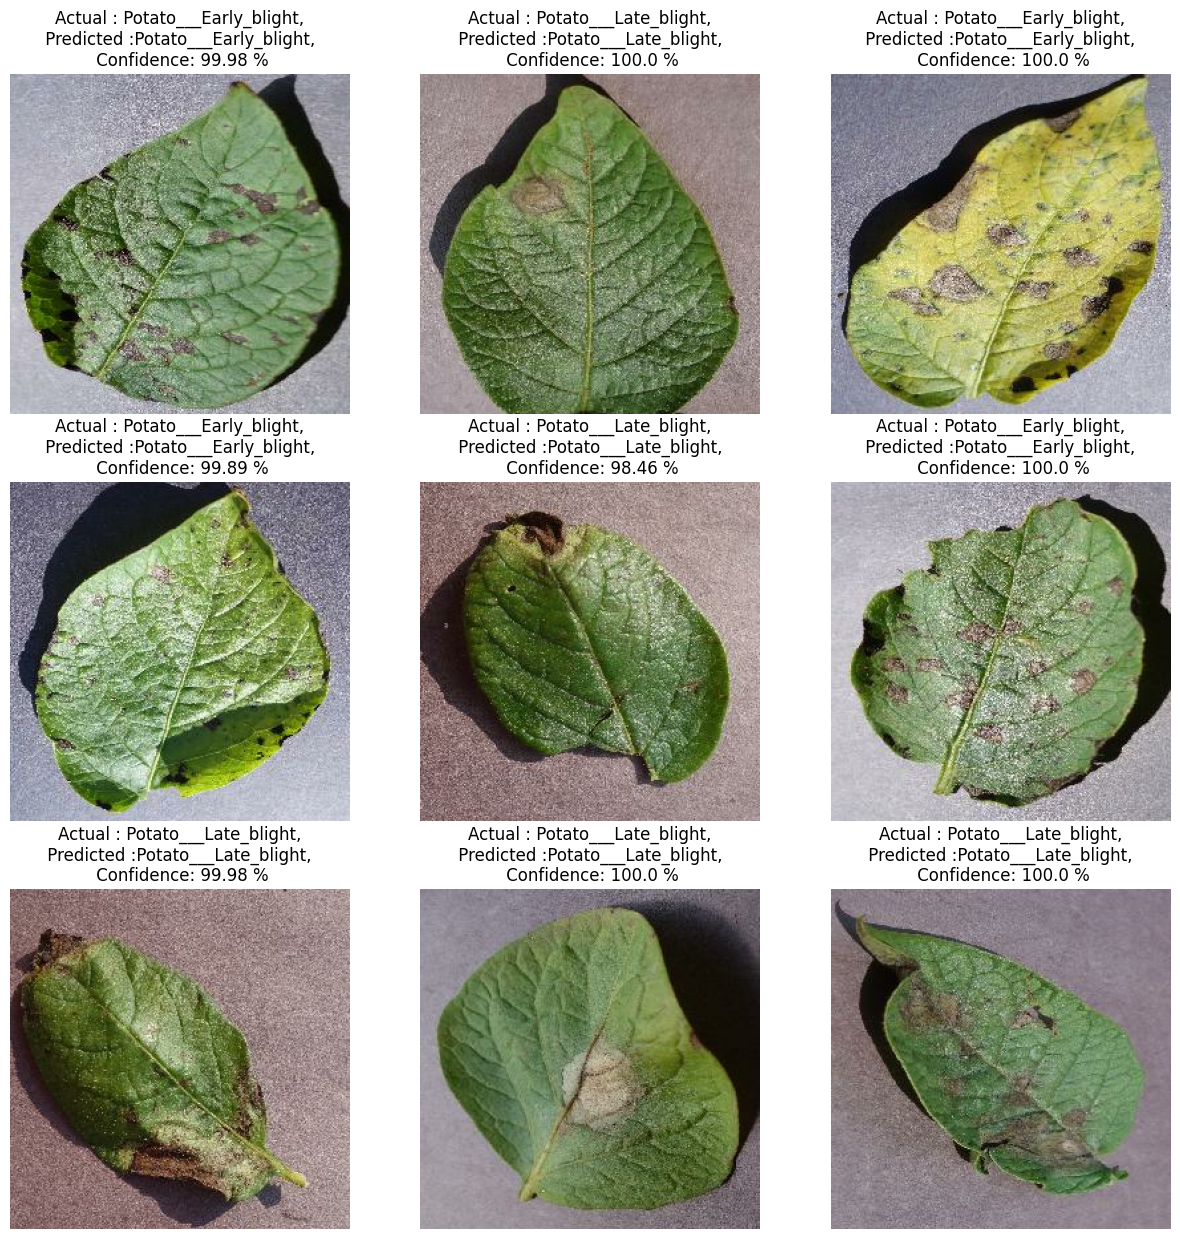

In [ ]:
plt.figure(figsize=(15,15))
for image, label in test_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, image)
    actual_class = class_names[label[i]]

    plt.title(f"Actual : {actual_class},\n Predicted :{predicted_class}, \n Confidence: {confidence} %")
    plt.axis('off')

In [ ]:
import os

model_dir = "../models"
existing_versions = [int(i) for i in os.listdir(model_dir) if i.isdigit()]

if existing_versions:
    model_version = max(existing_versions) + 1
else:
    model_version = 1

new_model_dir = os.path.join(model_dir, str(model_version))
model.save(new_model_dir)

In [ ]:
#import os
#model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
#model.save(f"../models/{model_version}")